In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

with open('/content/drive/MyDrive/deeplearning/diabetes_scale.txt', 'r') as f:
       lines = f.readlines()
data = []
for line in lines:
    parts = line.strip().split()
    label = int(parts[0])
    features = {int(p.split(':')[0]): float(p.split(':')[1]) for p in parts[1:]}
    data.append({'label': label, **features})
df = pd.DataFrame(data).fillna(0)
df.head()

,label,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [3]:
X = df.drop('label', axis=1).values
y = df['label'].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

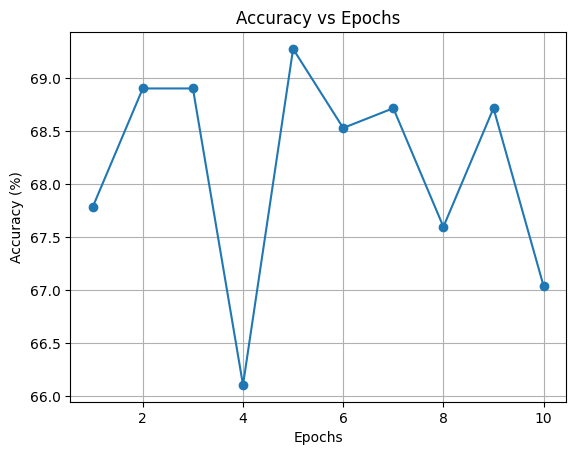

Accuracy: 74.03%


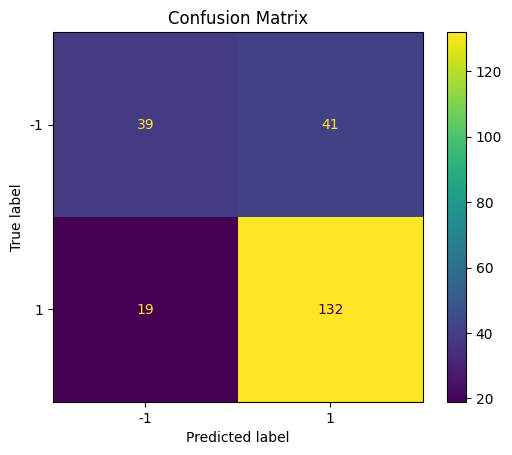

In [4]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracy_per_epoch = []

    def predict(self, inputs):
        sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return np.where(sum >= 0, 1, -1)

    def fit(self, training_inputs, labels):
        for epoch in range(self.epochs):
            correct_predictions = 0
            total_predictions = len(labels)
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                if prediction == label:
                    correct_predictions += 1
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

            accuracy = correct_predictions / total_predictions * 100
            self.accuracy_per_epoch.append(accuracy)
    def plot_accuracy_vs_epochs(self):

        #accuracy vs epoch
        plt.plot(range(1, self.epochs + 1), self.accuracy_per_epoch, marker='o')
        plt.title('Accuracy vs Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.grid(True)
        plt.show()

#Dtata split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training
perceptron = Perceptron(input_size=X.shape[1])
perceptron.fit(X_train, y_train)

#accuracy VS epoch
perceptron.plot_accuracy_vs_epochs()

#Testing
correct_predictions = 0
total_predictions = len(y_test)
y_pred = []

for inputs, label in zip(X_test, y_test):
    prediction = perceptron.predict(inputs)
    y_pred.append(prediction)
    if prediction == label:
        correct_predictions = correct_predictions + 1

#accuracy
accuracy = correct_predictions / total_predictions * 100
print(f"Accuracy: {accuracy:.2f}%")

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[-1, 1])
cmd.plot()
plt.title('Confusion Matrix')
plt.show()
